<a href="https://colab.research.google.com/github/sabrinabms/RNA-MPCA/blob/main/rna%26mpca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # **REDE NEURAL AUTO-CONFIGURADA PELO MPCA**
*Neste pacote é adotada uma abordagem automática para identificar a melhor arquitetura para a RNA. Essa identificação é formulada como um problema de otimização, resolvido por uma nova metaheurística: Algoritmo de Colisão de Partículas Múltiplas (MPCA).*

*O exemplo usado para testar o RNA&MPCA é o mesmo usado no artigo abaixo, onde são apresentados medidas de radiância para estimar 40 valores de temperatura (perfil).*


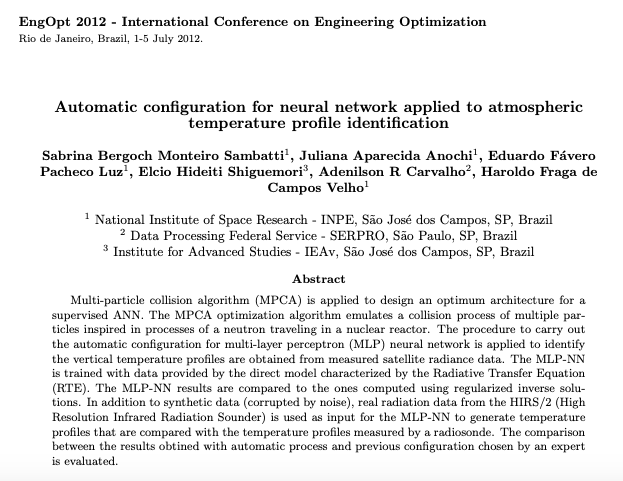

In [1]:
# Importando as bibliotecas necessárias
import os.path
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import *

# **Visualizando o conjunto de treinamento**

In [2]:
cwd = os.getcwd()
pasta_data = cwd+'/datain/'
# Entradas
entrada = np.loadtxt(pasta_data + 'x.txt')
entrada_gen = np.loadtxt(pasta_data + 'x_gen.txt')
entrada_valid = np.loadtxt(pasta_data + 'x_valid.txt')
entrada_test = np.loadtxt(pasta_data + 'x_test.txt')
# Saidas
saida = np.loadtxt(pasta_data + 'y.txt')
saida_gen = np.loadtxt(pasta_data + 'y_gen.txt')
saida_valid = np.loadtxt(pasta_data + 'y_valid.txt')
saida_test = np.loadtxt(pasta_data + 'y_test.txt')

### **Verificando o "tamanho" dos  dados de treinamento: entradas e saidas**

In [3]:
entrada.shape, saida.shape

((7, 250), (40, 250))

In [4]:
entrada_gen.shape, saida_gen.shape

((7, 100), (40, 100))

In [5]:
entrada_valid.shape, saida_valid.shape

((7, 50), (40, 50))

In [6]:
entrada_test.shape, saida_test.shape

((7, 246), (40, 246))

In [7]:
eixo_y = np.array([1.00e-01, 2.00e-01, 5.00e-01, 1.00e+00, 1.50e+00, 2.00e+00,
       3.00e+00, 4.00e+00, 5.00e+00, 7.00e+00, 1.00e+01, 1.50e+01,
       2.00e+01, 2.50e+01, 3.00e+01, 5.00e+01, 6.00e+01, 7.00e+01,
       8.50e+01, 1.00e+02, 1.15e+02, 1.35e+02, 1.50e+02, 2.00e+02,
       2.50e+02, 3.00e+02, 3.50e+02, 4.00e+02, 4.30e+02, 4.75e+02,
       5.00e+02, 5.70e+02, 6.20e+02, 6.70e+02, 7.00e+02, 7.80e+02,
       8.50e+02, 9.20e+02, 9.50e+02, 1.00e+03])

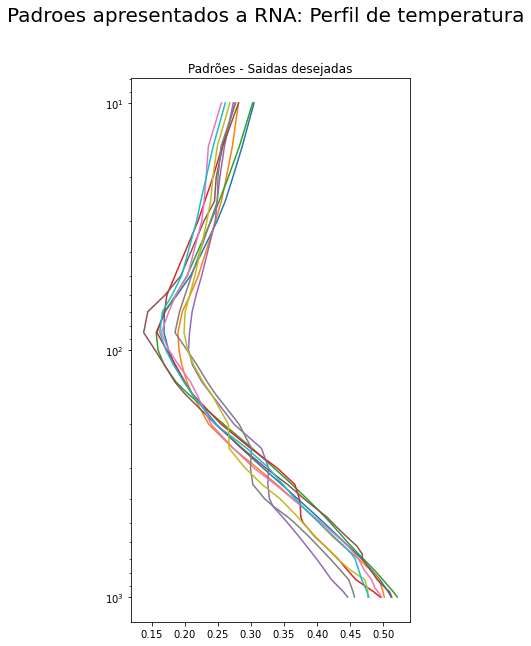

In [8]:
f1_master, f1_axes = plt.subplots(figsize=(5,10))
f1_master.suptitle('Padroes apresentados a RNA: Perfil de temperatura', size = 20)
f1_axes.set_title('Padrões - Saidas desejadas')
f1_axes.plot(saida[10:,0:10],eixo_y[10:])
f1_axes.set_yscale('log')
f1_axes.invert_yaxis()

# **Iniciando o processo: RNA&MPCA**


In [9]:
!make clean

rm -f build/*.o *.mod
rm -rf *.*~ Makefile~ build/*.o *.mod annTest annTest annMPCA


# **Define no próximo bloco os valores das seguintes variáveis:**
*   **n_proc**: numero de processadores
*   **n_exp**: numero de experimentos

In [10]:
n_exp = 4
n_proc = 2

In [11]:
!./runMPCA {n_exp} {n_proc}

mpif90 -c -O3 -g -w src/foul.f90 -o build/foul.o
/Users/sabrinabms/opt/anaconda3/bin/mpif90: line 392: x86_64-apple-darwin13.4.0-gfortran: command not found
make: *** [build/foul.o] Error 127
[mpiexec@MacBook-Pro-SBMS.local] match_arg (utils/args/args.c:163): unrecognized argument allow-run-as-root
[mpiexec@MacBook-Pro-SBMS.local] HYDU_parse_array (utils/args/args.c:178): argument matching returned error
[mpiexec@MacBook-Pro-SBMS.local] parse_args (ui/mpich/utils.c:1642): error parsing input array
[mpiexec@MacBook-Pro-SBMS.local] HYD_uii_mpx_get_parameters (ui/mpich/utils.c:1694): unable to parse user arguments
[mpiexec@MacBook-Pro-SBMS.local] main (ui/mpich/mpiexec.c:148): error parsing parameters
[mpiexec@MacBook-Pro-SBMS.local] match_arg (utils/args/args.c:163): unrecognized argument allow-run-as-root
[mpiexec@MacBook-Pro-SBMS.local] HYDU_parse_array (utils/args/args.c:178): argument matching returned error
[mpiexec@MacBook-Pro-SBMS.local] parse_args (ui/mpich/utils.c:1642): error p

In [12]:
!./annTest {n_exp}

zsh:1: no such file or directory: ./annTest


In [13]:
cwd = os.getcwd()
pasta_out = cwd+'/dataout/'
saida_test = np.loadtxt(pasta_out + 'result_test.out')

In [14]:
saida_test.shape

(246, 40)

In [15]:
saida_out = saida_test.transpose()

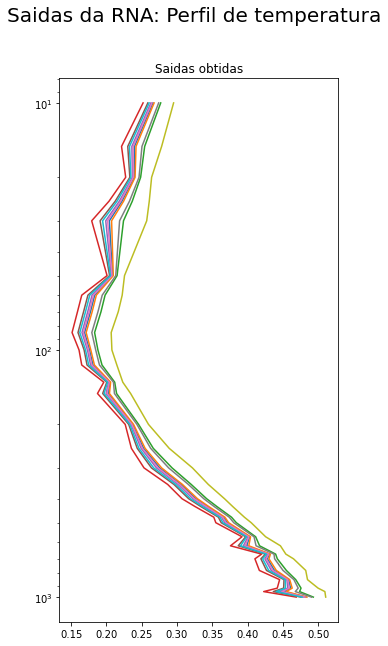

In [16]:
f2_master, f2_axes = plt.subplots(figsize=(5,10))
f2_master.suptitle('Saidas da RNA: Perfil de temperatura', size = 20)
f2_axes.set_title('Saidas obtidas')
f2_axes.plot(saida_out[10:,0:10],eixo_y[10:])
f2_axes.set_yscale('log')
f2_axes.invert_yaxis()

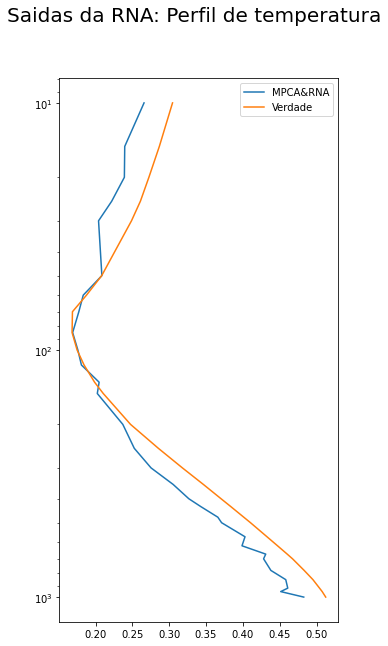

In [17]:
f2_master, f2_axes = plt.subplots(figsize=(5,10))
f2_master.suptitle('Saidas da RNA: Perfil de temperatura', size = 20)
f2_axes.plot(saida_out[10:,0],eixo_y[10:],label = 'MPCA&RNA')
f2_axes.plot(saida[10:,0],eixo_y[10:], label = 'Verdade')
f2_axes.set_yscale('log')
f2_axes.invert_yaxis()
f2_axes.legend()